# 线性回归
## 随机梯度下降 SGD

$第1步，准备训练集 D = \{(x,y)\}$

In [1]:
m = 200     #样本数
n = 10      #特征维度

In [2]:
import numpy as np
x = np.random.rand(m,n)     #输入变量
y = np.random.rand(m,1)     #标签 

$第2步，随机初始化(w_0,w_1,...,w_n)$

In [3]:
w = np.random.rand(1,n)

$第3步，从D中选择b个训练样本，计算并累积各样本的梯度$

In [4]:
b = 10       #每批训练b个样本
lr = 0.001   #学习率

In [5]:
def L(w,x_i,y_i,i):   #平方和损失函数
    return ((w.dot(x_i)-y_i)**2) / 2

In [6]:
def J(w,x,y):     #经验损失，即目标函数，要让它尽可能的小
    m = len(x)
    sum = 0
    for i in range(m):
        sum += L(w,x[i],y[i],i)
    return sum / m

In [7]:
def dJ(w,x_i,y_i,j):  #梯度
    return (w.dot(x_i) - y_i) * x_i[j]

In [8]:
def dJ_SGD(w,x,y,b):    #随机梯度下降
    m = len(x)
    n = len(w)
    banchs = np.random.randint(0,m,size=b)  #从m个样本中随机选b个
    for j in range(n):  
        dJ_all = []         
        for i in banchs:  #计算b个训练样本的平均梯度
            dJ_all.append(dJ(w,x[i],y[i],j))
        aver_dJ_all = np.average(dJ_all)
        w[j] = w[j] - lr*aver_dJ_all    #更新w
    return w

$第4步，更新参数，直至模型收敛$

In [9]:
cost = []
for i in range(10000) :  #J(w)小于0.1时，认为模型收敛
    w = dJ_SGD(w,x,y,b) 
    cost.append(J(w,x,y))
    if i % 100 == 0:
        print(J(w,x,y))
    if J(w,x,y) < 0.1 :
        print('模型已收敛')
        break

[2.68574182]
[1.77424826]
[1.14855607]
[0.76273731]
[0.50864126]
[0.3485989]
[0.25128998]
[0.18348115]
[0.14217448]
[0.11533108]
模型已收敛


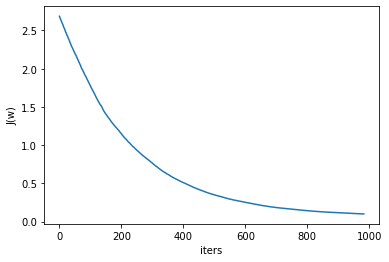

In [10]:
import matplotlib.pyplot as plt
plt.xlabel('iters') #迭代次数
plt.ylabel('J(w)')  #经验损失
plt.plot(cost)